<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_220826_Matplotlib_FuncAnimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matplotlib을 활용하여 움직이는 그래프 만들어보기
---

시그모이드 오차함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


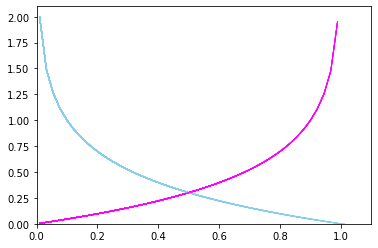

In [ ]:
fig, ax = plt.subplots()

# x축 y축 사이즈를 지정해주지 않으면 그래프와 함께 실시간으로 축 사이즈도 변화한다.
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 2.1)

# True일 때, -log10(predict)를, Flase일 때, -log10(1-predict)를 오차값으로 반환하는 함수
def binary(predict, T):
  if T:
    return -1 * np.log10(predict)
  else:
    return -1 * np.log10(1-predict)

# 범위의 값을 50개로 나누어 표현하도록 지정
loop = 50
# 0.01부터 1.1사이 값을 50개로 균등분할하여 array 반환 0~1이 아닌 이유는 log10(x)값이 0이 되면 안되기 때문
x = np.linspace(0.01, 1.1, num = loop)  
# 오차값 역시 array로 반환받아서 y축 값으로 설정
y_T = binary(x, 1)
y_F = binary(x, 0)

# FuncAnimation에 인자로 전달할 함수 설정.
def update(frame):
  plt.plot(x[:frame], y_T[:frame], color='skyblue', linewidth=1)
  plt.plot(x[:frame], y_F[:frame], color='magenta', linewidth=1)

# frames = update에 인자로 전달될 값. blit = True일 경우 update 함수에서 매번 artist object를 넘겨줘야 함.
ani = FuncAnimation(fig, update, frames = loop, blit=False)

# colab에서 구동하려면 HTML 함수가 필요
HTML(ani.to_jshtml())